In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing 


#import clean data
df = pd.read_csv("C:/Users/jhall/Desktop/D206/cleanedD206.csv")

#inspect data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9549 non-null   int64  
 1   CaseOrder             9549 non-null   int64  
 2   Customer_id           9549 non-null   object 
 3   Interaction           9549 non-null   object 
 4   City                  9549 non-null   object 
 5   State                 9549 non-null   object 
 6   County                9549 non-null   object 
 7   Zip                   9549 non-null   int64  
 8   Lat                   9549 non-null   float64
 9   Lng                   9549 non-null   float64
 10  Population            9549 non-null   int64  
 11  Area                  9549 non-null   object 
 12  Timezone              9549 non-null   object 
 13  Job                   9549 non-null   object 
 14  Children              9549 non-null   float64
 15  Age                  

In [170]:
# Convert 'Yes' to 1 and 'No' to 0
columns_to_convert = [
    "Tablet", "Phone", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0)



#Create dummy variables for Internet Services
categorical_vars = [
    'InternetService'
]

df_dummies = pd.get_dummies(df, columns=categorical_vars)

#inspecting new data set
df_dummies.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9549 non-null   int64  
 1   CaseOrder                    9549 non-null   int64  
 2   Customer_id                  9549 non-null   object 
 3   Interaction                  9549 non-null   object 
 4   City                         9549 non-null   object 
 5   State                        9549 non-null   object 
 6   County                       9549 non-null   object 
 7   Zip                          9549 non-null   int64  
 8   Lat                          9549 non-null   float64
 9   Lng                          9549 non-null   float64
 10  Population                   9549 non-null   int64  
 11  Area                         9549 non-null   object 
 12  Timezone                     9549 non-null   object 
 13  Job               

In [185]:
#Dropping Variables I don't want to use in the regression
columns_to_drop = ['InternetService_None','Unnamed: 0','Techie','Yearly_equip_failure','Outage_sec_perweek',
                   'Children','Age','Income','CaseOrder','Customer_id','Interaction','City','State','County',
                   'Zip','Lat','Lng','Population','Area','Timezone','Job','Education','Employment','Marital',
                   'Gender','Churn','Contract','Contacts','Email','Port_modem','Multiple','PaymentMethod',
                   'item1','item8','item2','item3','item4','item5','item6','item7']
df_dummies.drop(columns=[col for col in columns_to_drop if col in df_dummies], inplace=True)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tablet                       9549 non-null   int64  
 1   Phone                        9549 non-null   int64  
 2   OnlineSecurity               9549 non-null   int64  
 3   OnlineBackup                 9549 non-null   int64  
 4   DeviceProtection             9549 non-null   int64  
 5   TechSupport                  9549 non-null   int64  
 6   StreamingTV                  9549 non-null   int64  
 7   StreamingMovies              9549 non-null   int64  
 8   PaperlessBilling             9549 non-null   int64  
 9   Tenure                       9549 non-null   float64
 10  MonthlyCharge                9549 non-null   float64
 11  Bandwidth_GB_Year            9549 non-null   float64
 12  InternetService_DSL          9549 non-null   uint8  
 13  InternetService_Fi

In [193]:
#Exporting DataFrame with only Variables used in intial regression.
df_dummies.to_csv('C:/Users/jhall/Desktop/D208 part 1/D208Part1v2.csv', index=False)

In [192]:
# Description for each variable used in the regression
Descriptions = ['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic',
            ]

#Looping through
for variable in Descriptions:
    print(f"Description of {variable}:")
    print(df_dummies[variable].describe(), "\n")


Description of Tablet:
count    9549.000000
mean        0.300136
std         0.458341
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Tablet, dtype: float64 

Description of Phone:
count    9549.000000
mean        0.915698
std         0.277855
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Phone, dtype: float64 

Description of OnlineSecurity:
count    9549.000000
mean        0.356163
std         0.478889
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OnlineSecurity, dtype: float64 

Description of OnlineBackup:
count    9549.000000
mean        0.450623
std         0.497582
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OnlineBackup, dtype: float64 

Description of DeviceProtection:
count    9549.000000
mean        0.438056
std        

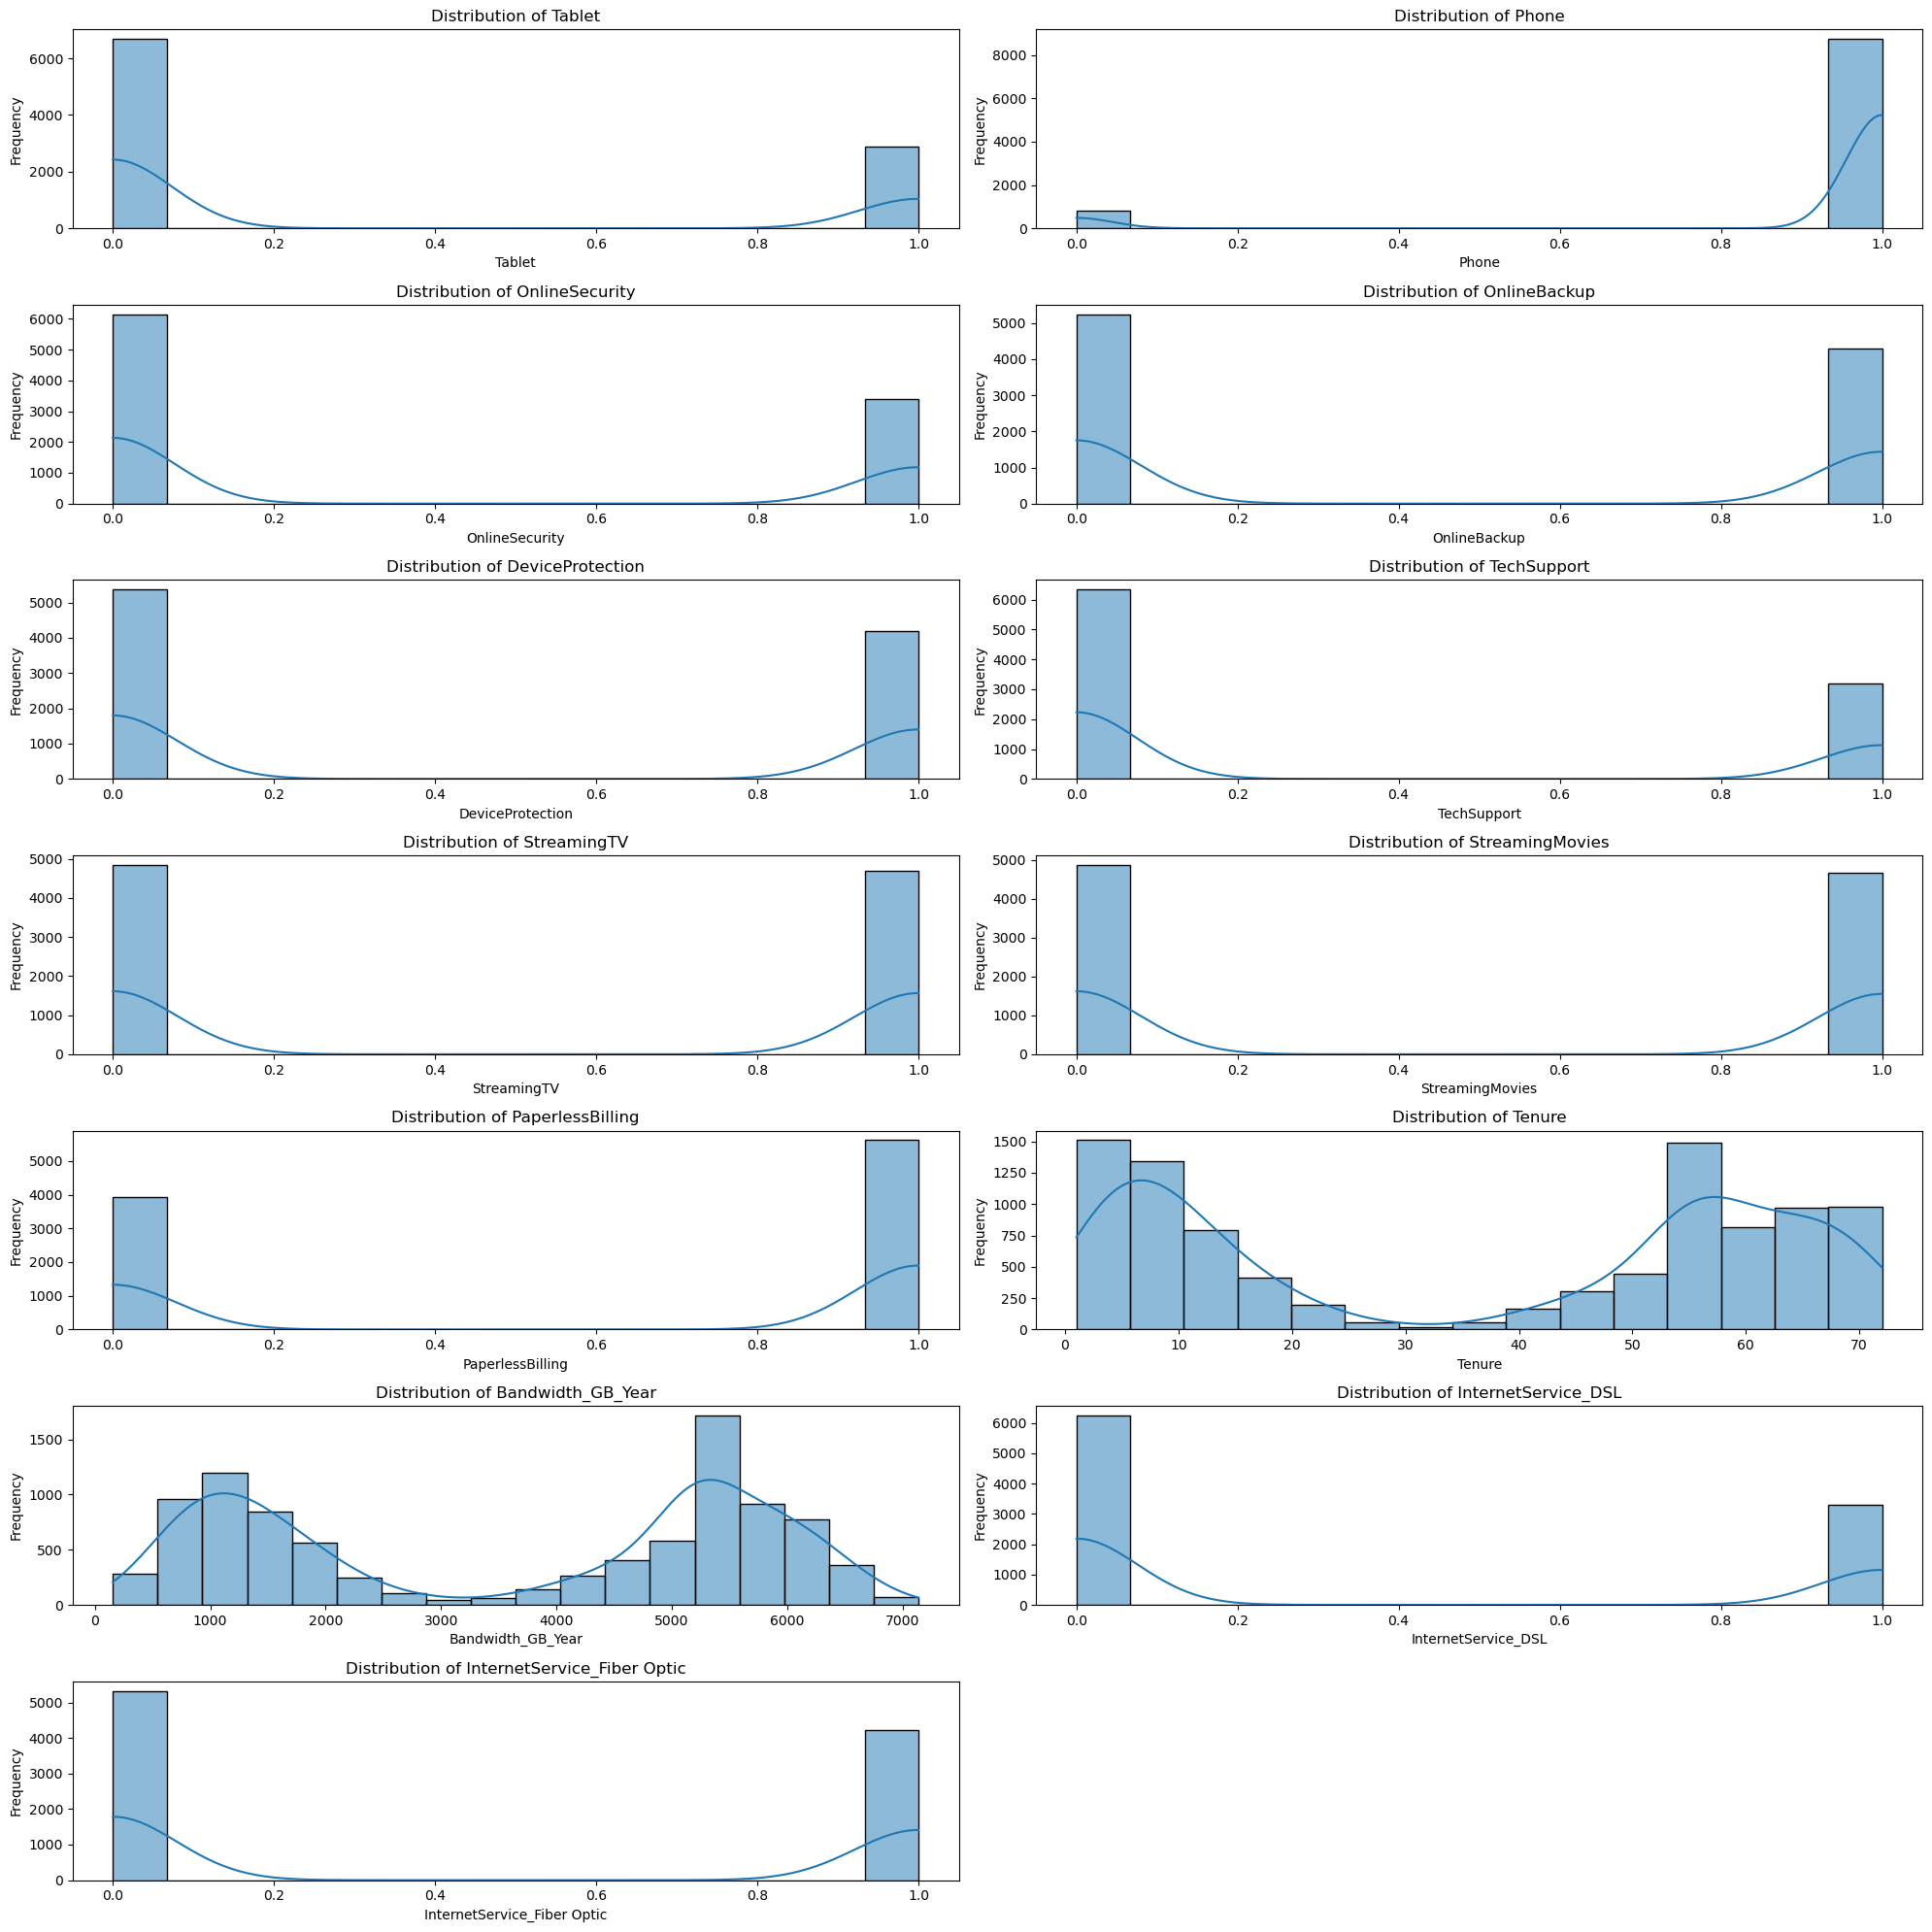

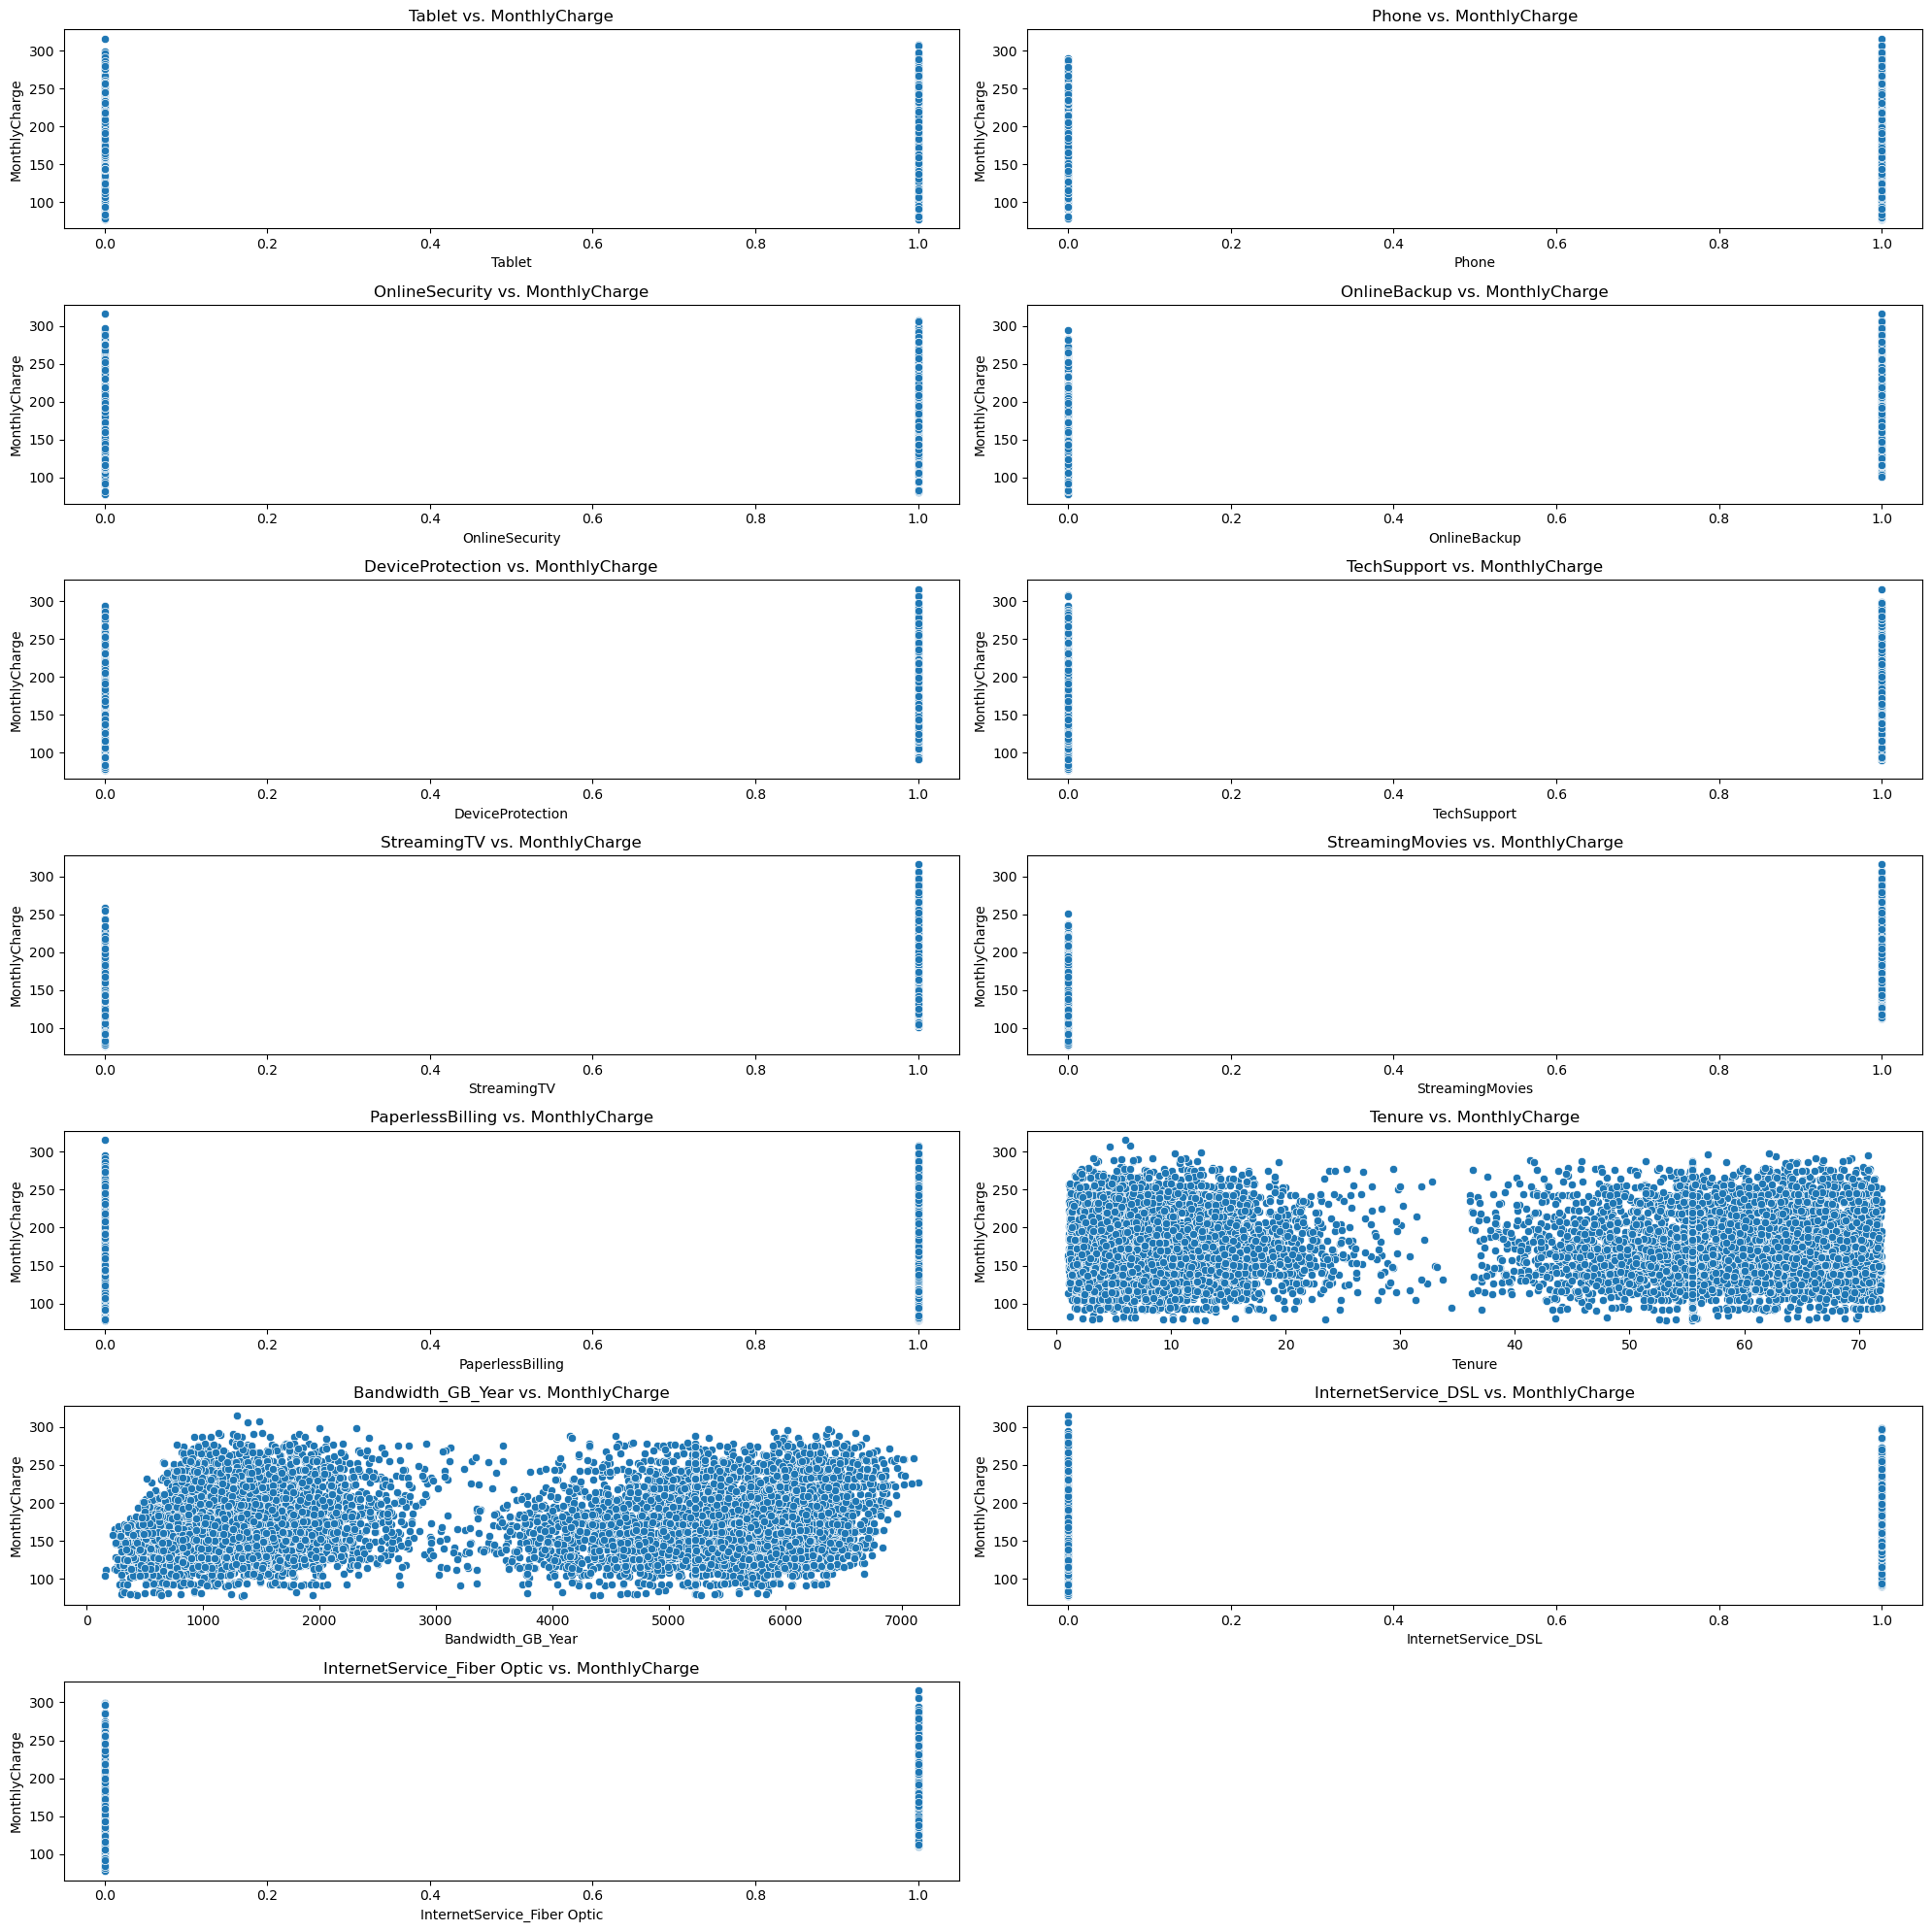

In [194]:
# List of independent variables for visualization
variables = ['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic',
            ]

# Setting up the figure for univariate visualizations (histograms)
plt.figure(figsize=(20, 20))  

# Looping through variables for univariate histograms
for i, variable in enumerate(variables, 1): 
    plt.subplot(7, 2, i)  
    sns.histplot(df_dummies[variable], kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Setting up the figure for bivariate visualizations (scatter plots)
plt.figure(figsize=(20, 20)) 

# Looping through variables for scatter plots
for i, variable in enumerate(variables, 1): 
    plt.subplot(7, 2, i)  
    sns.scatterplot(x=df_dummies[variable], y=df['MonthlyCharge'])
    plt.title(f'{variable} vs. MonthlyCharge')
    plt.xlabel(variable)
    plt.ylabel('MonthlyCharge')

plt.tight_layout()
plt.show()


In [174]:
# Defining the independent variables "X" and the dependent variable "Y"
X = df_dummies[['Tablet', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','PaperlessBilling','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic']]  
y = df_dummies['MonthlyCharge']  

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     2861.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:52:36   Log-Likelihood:                -41934.
No. Observations:                9549   AIC:                         8.390e+04
Df Residuals:                    9535   BIC:                         8.400e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

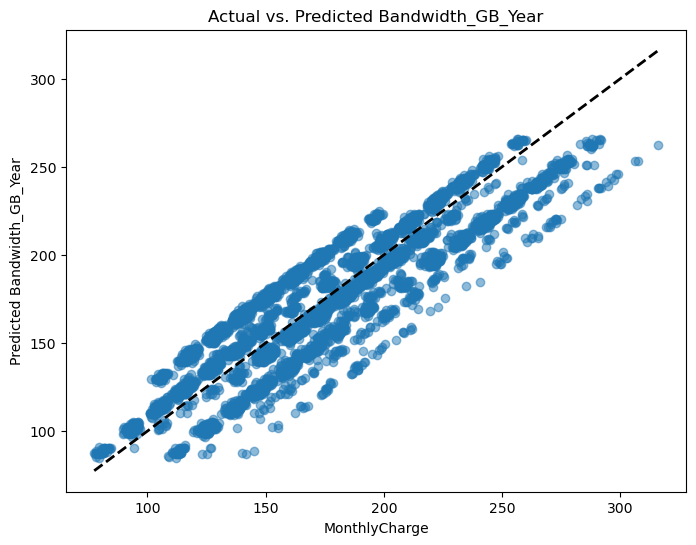

In [175]:
# Predicting Bandwidth_GB_Year using the regression model
y_pred = model.predict(X)

# Plotting Actual vs. Predicted Bandwidth_GB_Year
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Reference line
plt.xlabel('MonthlyCharge')
plt.ylabel('Predicted Bandwidth_GB_Year')
plt.title('Actual vs. Predicted Bandwidth_GB_Year')
plt.show()

In [180]:
# Defining the independent variables (predictors) and the dependent variable (target)
X = df_dummies[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
             'StreamingMovies','Tenure','Bandwidth_GB_Year','InternetService_DSL',
             'InternetService_Fiber Optic']]  # Selecting predictors
y = df_dummies['MonthlyCharge']  # Target variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model using Ordinary Least Squares (OLS) method
model_reduced = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_reduced_summary = model_reduced.summary()
print(model_reduced_summary)

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3718.
Date:                Mon, 11 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:52:59   Log-Likelihood:                -41936.
No. Observations:                9549   AIC:                         8.389e+04
Df Residuals:                    9538   BIC:                         8.397e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

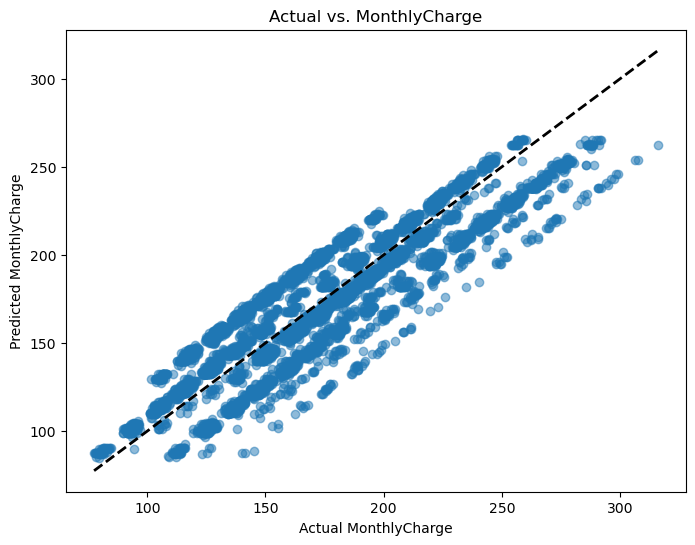

In [181]:
# Predicting Bandwidth_GB_Year using the regression model
y_pred = model_reduced.predict(X)

# Plotting Actual vs. Predicted Bandwidth_GB_Year
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)  # Plot actual vs. predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for perfect predictions
plt.xlabel('Actual MonthlyCharge')
plt.ylabel('Predicted MonthlyCharge')
plt.title('Actual vs. MonthlyCharge')
plt.show()


In [182]:
# RSE calculation
residuals = y - model_reduced.predict(X)
RSE = np.sqrt(np.sum(residuals**2) / (len(y) - len(X.columns)))

print(f"Residual Standard Error: {RSE}")


Residual Standard Error: 19.55706367031379


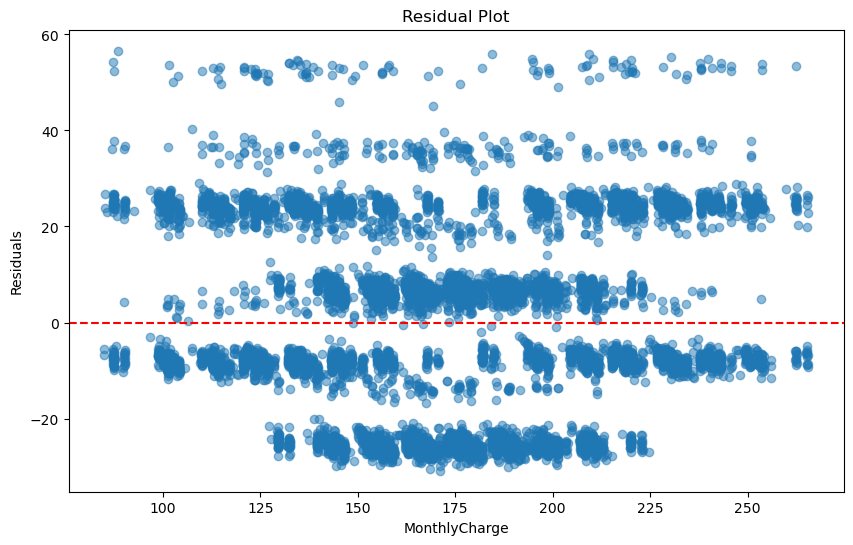

In [183]:
predicted_values = model_reduced.predict(X)
residuals = y - predicted_values

plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('MonthlyCharge')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()